In [1]:
# use pip to install pandas, matplotlib if needed
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn import set_config
from sklearn.model_selection import train_test_split
set_config(display="text")  # displays text representation of estimators

os.chdir("..")
from scr.utils import *
from scr.runSurvModels import *

# Deep Learning Methods

When running different packages, different python environments might be needed. Therefore, we create virtual environments with varying python versions to avoid package version incompatibilities. The usual steps are as follows:


> venv/Scripts/activate

Or, if you are operating from a MacOS/Linux system:

> source venv/bin/activate

## DeepSurv
> git clone https://github.com/jaredleekatzman/DeepSurv.git \
> cd DeepSurv\
> pip install .

## DeepSurvK (Python v3.8+)
DeepSurvK is an adaptation of DeepSurv to deep NN training with Keras `Tensorflow` in later versions of python. It's also easier to install using the `pip` tool that comes with python installation. Here's how:

> pip install deepsurvk

## Cox-nnet

*NOTE: Cox-nnet requires python2.x which is currently deprecated. Due to dependency inavailability, we no longer consider including this method in the comparison.*

Using the bellow command lines to install the cox-nnet package (*Python version 2.7.* *)
> git clone https://github.com/lanagarmire/cox-nnet.git \
> cd cox-nnet \
> pip install . 

In [2]:
# prepare data
folder = 'linear'
keywords = ['exponential', 'orig']

train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords)

# Tree Methods

## Random Survival Forest

### Hyperparameter search

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=0.5,
             estimator=RandomSurvivalForest(max_depth=3, n_estimators=500,
                                            n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 15, 25],
                         'min_samples_split': [3, 10, 20]})

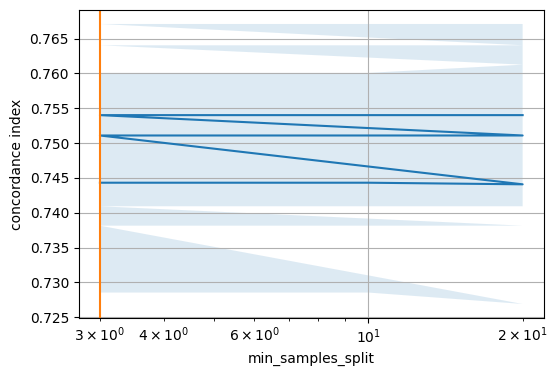

In [4]:
manual_hyperparameters = {
    # 'n_estimators': [100, 500,800],
    # 'max_depth': [3, 5, 7],
    'min_samples_split': [3,10,20],
    'min_samples_leaf': [5,15,25]
}
# parameters for fitting RSF models
kwargs = {
    'n_estimators':500,
    'max_depth': 3,
    # 'min_samples_split':10,
    # 'min_samples_leaf':15,
    'n_jobs':-1, 
    'random_state':42
}
rsf = RandomSurvivalForestModel(X_train[:1000], y_train[:1000], X_test, y_test,
                                hyperparameters=manual_hyperparameters)
rsf.build_model(**kwargs)
search = rsf.tune_hyperparameters(n_split=5, plotting_param='min_samples_split')
search

### Fitting model with best parameters

In [ ]:
# parameters for fitting RSF models
kwargs = {'n_estimators':500, 
          'min_samples_split':10,
        'min_samples_leaf':15,
        'n_jobs':-1, 
        'random_state':42}
rsf = RandomSurvivalForestModel(X_train, y_train, X_test, y_test, dataName='exponential-RW')
rsf.build_model(**kwargs)
rsf_results, rsf_dict = rsf.train(subset=[50,200,500,1000,2000,5000,8000])
rsf.write(rsf_dict)

# N=50 Training time (0.99s): Train C-Index: 0.756 | Test C-index: 0.63
# N=200 Training time (0.97s): Train C-Index: 0.842 | Test C-index: 0.747
# N=500 Training time (5.7s): Train C-Index: 0.865 | Test C-index: 0.782
# N=1000 Training time (28.69s): Train C-Index: 0.868 | Test C-index: 0.798
# N=2000 Training time (139.52s): Train C-Index: 0.878 | Test C-index: 0.815
# N=5000 Training time (1013.03s): Train C-Index: 0.884 | Test C-index: 0.829
# N=8000 Training time (2812.81s): Train C-Index: 0.888 | Test C-index: 0.837

# N=50 Training time (0.93s): Train C-Index: 0.796 | Test C-index: 0.615
# N=200 Training time (1.06s): Train C-Index: 0.851 | Test C-index: 0.733
# N=500 Training time (5.73s): Train C-Index: 0.885 | Test C-index: 0.809
# N=1000 Training time (26.79s): Train C-Index: 0.899 | Test C-index: 0.826
# N=2000 Training time (131.26s): Train C-Index: 0.9 | Test C-index: 0.842
# N=5000 Training time (960.17s): Train C-Index: 0.908 | Test C-index: 0.858
# N=8000 Training time (2648.21s): Train C-Index: 0.911 | Test C-index: 0.865

### Load data


In [3]:
# parameters for fitting GB models
subset=[
        50, 500, 1000, 2000, 5000, 8000
]

kwargs = {'n_estimators':500, 
        'min_samples_split':10,
        'min_samples_leaf':15,
        'n_jobs':-1, 
        'random_state':42}


### Linear: Moderate

In [3]:
# prepare data
folder = 'linear'
keywords = ['moderate', "latest", 'RW']
DATANAME = 'linear-moderate'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)

X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

Train event rate: 0.75075
Test event rate:  0.751


In [ ]:

rsf = RandomSurvivalForestModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
rsf.build_model(**kwargs)
rsf_results, rsf_dict = rsf.train(subset=subset)
# rsf.write(rsf_dict)
rsf_results

# N=50 Training time (1.08s): Train C-Index: 0.739 | Test C-index: 0.625
# N=500 Training time (4.72s): Train C-Index: 0.808 | Test C-index: 0.698
# N=1000 Training time (22.63s): Train C-Index: 0.817 | Test C-index: 0.717
# N=2000 Training time (109.4s): Train C-Index: 0.822 | Test C-index: 0.722
# N=5000 Training time (881.86s): Train C-Index: 0.826 | Test C-index: 0.736

: 

### Linear: Weak

Train event rate: 0.75025
Test event rate:  0.7505
Survival time distribution:


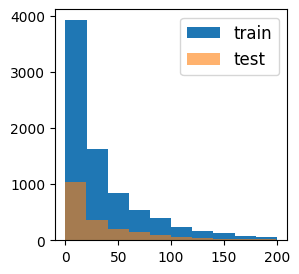

In [4]:
# prepare data
folder = 'linear'
keywords = ['weak', "latest", 'RW']
DATANAME = 'linear-weak'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)

X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

# observe data
print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
# ax.hist(val_df['time'],   label='val', alpha=.8)
ax.hist(test_df['time'], label='test', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

In [6]:
rsf = RandomSurvivalForestModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
rsf.build_model(**kwargs)
rsf_results, rsf_dict = rsf.train(subset=[50, 500, 1000, 2000, 5000])
# rsf.write(rsf_dict)
rsf_results

N=50 Training time (0.94s): Train C-Index: 0.754 | Test C-index: 0.606
N=500 Training time (5.41s): Train C-Index: 0.8 | Test C-index: 0.657
N=1000 Training time (25.12s): Train C-Index: 0.801 | Test C-index: 0.667
N=2000 Training time (118.45s): Train C-Index: 0.803 | Test C-index: 0.668
N=5000 Training time (911.14s): Train C-Index: 0.809 | Test C-index: 0.676


,n train,train time,train score,test score
0,50,0.94,0.753754,0.606026
1,500,5.41,0.800174,0.656596
2,1000,25.12,0.801254,0.666834
3,2000,118.45,0.802819,0.668245
4,5000,911.14,0.808636,0.675912


In [7]:
rsf.write(rsf_results)

### Nonliear: Quadratic terms

Train event rate: 0.747875
Test event rate:  0.748
Survival time distribution:


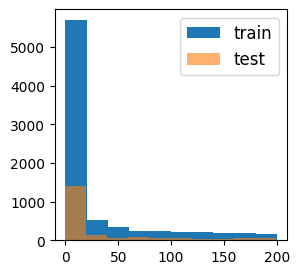

In [5]:
# prepare data
folder = 'nonlinear'
keywords = ['quadratic', "latest", 'RW']
DATANAME = 'nl-quadratic'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)

X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

# observe data
print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
# ax.hist(val_df['time'],   label='val', alpha=.8)
ax.hist(test_df['time'], label='test', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

In [ ]:
rsf = RandomSurvivalForestModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
rsf.build_model(**kwargs)
rsf_results, rsf_dict = rsf.train(subset=[5000])
# rsf.write(rsf_results)
rsf_results

# N=50 Training time (0.93s): Train C-Index: 0.778 | Test C-index: 0.556
# N=500 Training time (5.27s): Train C-Index: 0.857 | Test C-index: 0.708
# N=1000 Training time (27.3s): Train C-Index: 0.868 | Test C-index: 0.757
# N=2000 Training time (130.63s): Train C-Index: 0.873 | Test C-index: 0.768
# N=5000 Training time (972.11s): Train C-Index: 0.877 | Test C-index: 0.789

N=5000 Training time (972.11s): Train C-Index: 0.877 | Test C-index: 0.789


,n train,train time,train score,test score
0,5000,972.11,0.876569,0.789075


In [6]:
rsf.write(rsf_results)

### Nonliear: Quadratic Interaction

Train event rate: 0.74875
Test event rate:  0.7485
Survival time distribution:


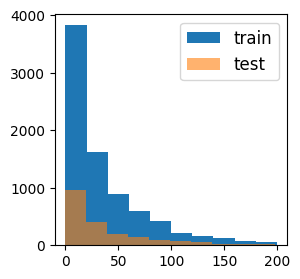

In [6]:
# prepare data
folder = 'nonlinear'
keywords = ['interaction', "latest", 'RW']
DATANAME = 'nl-interaction'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)

X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

# observe data
print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
# ax.hist(val_df['time'],   label='val', alpha=.8)
ax.hist(test_df['time'], label='test', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

In [ ]:
rsf = RandomSurvivalForestModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
rsf.build_model(**kwargs)
rsf_results, rsf_dict = rsf.train(subset=[50, 500, 1000, 2000, 5000])
# rsf.write(rsf_results)
rsf_results

N=50 Training time (0.94s): Train C-Index: 0.732 | Test C-index: 0.575
N=500 Training time (5.47s): Train C-Index: 0.828 | Test C-index: 0.623
N=1000 Training time (28.59s): Train C-Index: 0.818 | Test C-index: 0.638
N=2000 Training time (137.64s): Train C-Index: 0.822 | Test C-index: 0.644


### Nonlinear: Sine

Train event rate: 0.75175
Test event rate:  0.752
Survival time distribution:


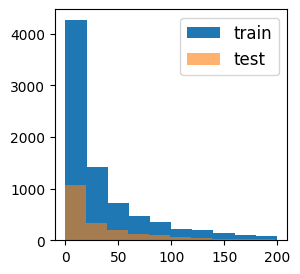

In [7]:
# prepare data
folder = 'nonlinear'
keywords = ['sine', "latest", 'RW']
DATANAME = 'nl-sine'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)
X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

# observe data
print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
# ax.hist(val_df['time'],   label='val', alpha=.8)
ax.hist(test_df['time'], label='test', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

In [8]:
rsf = RandomSurvivalForestModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
rsf.build_model(**kwargs)
rsf_results, rsf_dict = rsf.train(subset=[50, 500, 1000, 2000, 5000])
# rsf.write(rsf_results)
rsf_results

N=50 Training time (0.92s): Train C-Index: 0.746 | Test C-index: 0.567
N=500 Training time (5.74s): Train C-Index: 0.816 | Test C-index: 0.611
N=1000 Training time (28.27s): Train C-Index: 0.825 | Test C-index: 0.641
N=2000 Training time (128.46s): Train C-Index: 0.821 | Test C-index: 0.65
N=5000 Training time (979.55s): Train C-Index: 0.827 | Test C-index: 0.673


,n train,train time,train score,test score
0,50,0.92,0.746255,0.566608
1,500,5.74,0.816126,0.610657
2,1000,28.27,0.825152,0.640657
3,2000,128.46,0.821237,0.649756
4,5000,979.55,0.826720,0.672886


In [ ]:
rsf_results

,n train,train time,train score,test score
0,50,0.65,0.965414,0.581862
1,500,1.45,0.790279,0.598925
2,1000,2.48,0.690678,0.597732
3,2000,2.87,0.712586,0.626472
4,5000,3.65,0.672141,0.631717
5,8000,4.19,0.713149,0.659110


## Gradient Boosting

In [8]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

In [9]:
est_early_stopping = GradientBoostingSurvivalAnalysis(
    n_estimators=1000, learning_rate=0.1, subsample=0.5, max_depth=1, random_state=0
)

monitor = EarlyStoppingMonitor(10, 5)

est_early_stopping.fit(X_train, y_train, monitor=monitor)

print("Fitted base learners:", est_early_stopping.n_estimators_)

cindex = est_early_stopping.score(X_test, y_test)
print("Performance on test set", round(cindex, 3))

NameError: name 'EarlyStoppingMonitor' is not defined

In [16]:
gb_kwargs = {
    'n_estimators':500, 
    # 'n_jobs':-1, 
    'random_state':42
}
gb_hyperparameters = {
    'learning_rate': [0.1, 0.9],
    'max_depth': [1, 5, 10]
}

gb =  GradientBoostingSurvivalModel(X_train[:500], y_train[:500], X_test, y_test,
                                    hyperparameters=gb_hyperparameters)
gb.build_model(**gb_kwargs)
gb_cv = gb.tune_hyperparameters(n_split=5)
pd.DataFrame(gb_cv.cv_results_)

/home/nfs/dengy/mind-crc-env/lib/python3.10/site-packages/sksurv/linear_model/coxph.py:83: RuntimeWarning: overflow encountered in exp
  self.baseline_survival_ = StepFunction(uniq_times, np.exp(-y))
/home/nfs/dengy/mind-crc-env/lib/python3.10/site-packages/sksurv/linear_model/coxph.py:83: RuntimeWarning: overflow encountered in exp
  self.baseline_survival_ = StepFunction(uniq_times, np.exp(-y))
/home/nfs/dengy/mind-crc-env/lib/python3.10/site-packages/sksurv/linear_model/coxph.py:83: RuntimeWarning: overflow encountered in exp
  self.baseline_survival_ = StepFunction(uniq_times, np.exp(-y))
/home/nfs/dengy/mind-crc-env/lib/python3.10/site-packages/sksurv/linear_model/coxph.py:83: RuntimeWarning: overflow encountered in exp
  self.baseline_survival_ = StepFunction(uniq_times, np.exp(-y))
/home/nfs/dengy/mind-crc-env/lib/python3.10/site-packages/sksurv/linear_model/coxph.py:83: RuntimeWarning: overflow encountered in exp
  self.baseline_survival_ = StepFunction(uniq_times, np.exp(-y))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,78.987563,0.940394,0.018028,0.028702,0.1,1,"{'learning_rate': 0.1, 'max_depth': 1}",0.830909,0.816364,0.804242,0.841818,0.822626,0.823192,0.012748,1
1,246.343846,4.950607,0.005623,0.000440,0.1,5,"{'learning_rate': 0.1, 'max_depth': 5}",0.810505,0.809899,0.789697,0.796768,0.790707,0.799515,0.009057,4
2,309.232191,4.486070,0.009736,0.000189,0.1,10,"{'learning_rate': 0.1, 'max_depth': 10}",0.748081,0.759192,0.746263,0.718384,0.754747,0.745333,0.014250,6
3,78.518984,1.109372,0.003462,0.000050,0.9,1,"{'learning_rate': 0.9, 'max_depth': 1}",0.811111,0.804040,0.812121,0.808485,0.807273,0.808606,0.002873,3
4,244.037484,6.315745,0.005808,0.000743,0.9,5,"{'learning_rate': 0.9, 'max_depth': 5}",0.827879,0.820202,0.809091,0.812121,0.806667,0.815192,0.007815,2
5,336.418411,25.017336,0.010486,0.000395,0.9,10,"{'learning_rate': 0.9, 'max_depth': 10}",0.767273,0.782828,0.763434,0.729495,0.754343,0.759475,0.017590,5


In [18]:
# parameters for fitting RSF models
kwargs = {'n_estimators':500, 
        'learning_rate':0.1,
        'max_depth':1,
        # 'n_jobs':-1, 
        'random_state':42}
gb = GradientBoostingSurvivalModel(X_train, y_train, X_test, y_test)
gb.build_model(**kwargs)
gb_results, gb_dict = gb.train(subset=[50,200,500,1000,2000,5000,8000])
gb.write(gb_dict)

# N=50 Training time (2.15s): Train C-Index: 0.996 | Test C-index: 0.685
# N=200 Training time (9.56s): Train C-Index: 0.944 | Test C-index: 0.785
# N=500 Training time (26.79s): Train C-Index: 0.91 | Test C-index: 0.808
# N=1000 Training time (60.01s): Train C-Index: 0.887 | Test C-index: 0.827
# N=2000 Training time (141.16s): Train C-Index: 0.873 | Test C-index: 0.837
# N=5000 Training time (488.76s): Train C-Index: 0.865 | Test C-index: 0.844

N=50 Training time (2.15s): Train C-Index: 0.996 | Test C-index: 0.685
N=200 Training time (9.56s): Train C-Index: 0.944 | Test C-index: 0.785
N=500 Training time (26.79s): Train C-Index: 0.91 | Test C-index: 0.808
N=1000 Training time (60.01s): Train C-Index: 0.887 | Test C-index: 0.827
N=2000 Training time (141.16s): Train C-Index: 0.873 | Test C-index: 0.837
N=5000 Training time (488.76s): Train C-Index: 0.865 | Test C-index: 0.844


In [17]:
%%time
random_state = 42
subset = [50, 200, 500, 1000, 2000, 5000, 8000]
gb_dict, gb_train_scores, gb_test_scores = {},{},{}
for n in subset:
    start = time.time()
    gb = GradientBoostingSurvivalAnalysis(
        n_estimators=500, learning_rate=0.1, max_depth=1, random_state=0
        ).fit(X_train[:n], y_train[:n])
    gb_dict[str(n)] = gb
    stop = time.time()
    duration = round(stop-start, 3)
    
    train_score = gb.score(X_train[:n], y_train[:n])
    gb_train_scores[str(n)] = train_score
    test_score = gb.score(X_test, y_test)
    gb_test_scores[str(n)] = test_score
        
    print(
        f'N={n} Training Time {duration}s:\tTrain C-Index: {train_score} | Test C-Index: {test_score}'
    )

Train C-Index: 0.9918367346938776	| Test C-Index: 0.7448410690579366
Train C-Index: 0.9416264090177133	| Test C-Index: 0.7726718933947849
Train C-Index: 0.8974929690638811	| Test C-Index: 0.789535355559452
Train C-Index: 0.8696315018755892	| Test C-Index: 0.7998797685544673
Train C-Index: 0.8456953526199313	| Test C-Index: 0.8047316083460662
Train C-Index: 0.8256932671453335	| Test C-Index: 0.807749918593292


# Baseline: CoxPH model

In [11]:
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV, KFold

### Hyperparameter Search

/tmp/ipykernel_377934/3934129116.py:1: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=1000).
  coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001, max_iter=1000).fit(X_train, y_train)


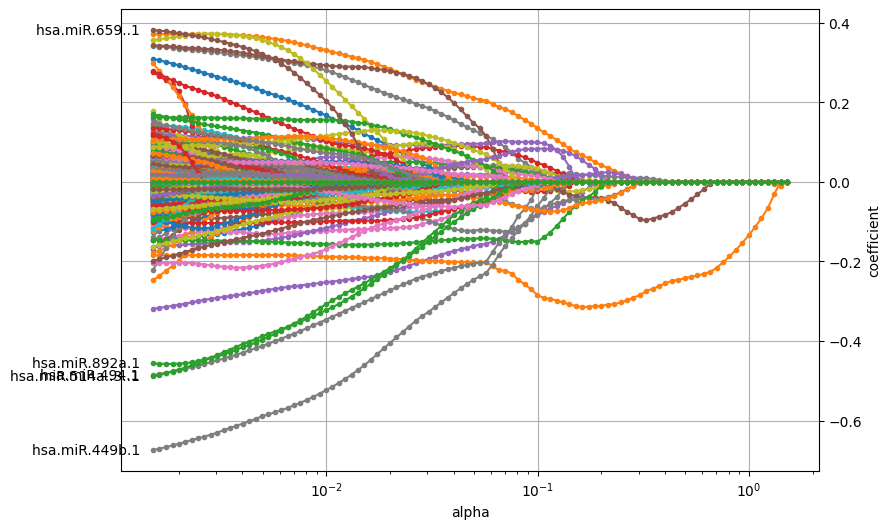

In [70]:
coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001, max_iter=1000).fit(X_train, y_train)

coefficients = pd.DataFrame(coxnet.coef_, index=train_df.columns[:-2], columns=np.round(coxnet.alphas_, 5))
plot_coefficients(coefficients, n_highlight=5)

In [ ]:
alphas =  [0.1, 10] #coxnet.alphas_

coxnet_hyperparameters={
    "alphas": [[a] for a in alphas],
    'l1_ratio': [0.1, 0.9]
}
coxnet = CoxPHElasticNetModel(X_train, y_train, X_test, y_test,
                            hyperparameters=coxnet_hyperparameters)
coxnet.build_model()
cv_results = coxnet.tune_hyperparameters(n_split=5, plotting_param='alphas')
# cv_results = pd.DataFrame(coxnet.cv_results_)
cv_results

In [13]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alphas,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,46.204700,1.347625,0.055914,0.001843,[0.001],0.1,"{'alphas': [0.001], 'l1_ratio': 0.1}",0.911458,0.905810,0.908276,0.910700,0.908393,0.908927,0.001999,4
1,42.287379,2.126294,0.056750,0.007874,[0.001],0.9,"{'alphas': [0.001], 'l1_ratio': 0.9}",0.915196,0.909837,0.912978,0.914337,0.911887,0.912847,0.001883,2
2,34.823239,2.155184,0.093512,0.008081,[0.01],0.1,"{'alphas': [0.01], 'l1_ratio': 0.1}",0.913515,0.907758,0.911669,0.914191,0.911716,0.911770,0.002237,3
3,29.688668,1.168285,0.124735,0.025512,[0.01],0.9,"{'alphas': [0.01], 'l1_ratio': 0.9}",0.918818,0.913556,0.917085,0.919981,0.916771,0.917242,0.002183,1
4,16.543225,2.392059,0.178689,0.029070,[0.1],0.1,"{'alphas': [0.1], 'l1_ratio': 0.1}",0.901618,0.895208,0.900865,0.904381,0.900726,0.900560,0.002983,5
5,1.755442,0.192350,0.242111,0.042911,[0.1],0.9,"{'alphas': [0.1], 'l1_ratio': 0.9}",0.866313,0.859564,0.870020,0.872047,0.861307,0.865850,0.004820,6


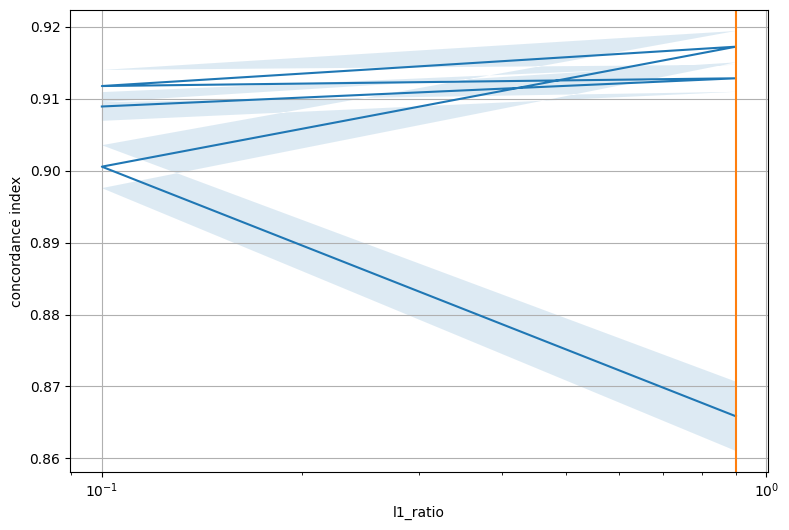

In [37]:
param = 'l1_ratio'
try:
    params = cv_results[f'param_{param}'].map(lambda x: x[0])
except TypeError:
    params = cv_results[f'param_{param}']
mean = cv_results.mean_test_score
std = cv_results.std_test_score


fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(params, mean)
ax.fill_between(params, mean - std, mean + std, alpha=0.15)
ax.set_xscale("log")
ax.set_xlabel(param)
ax.set_ylabel("concordance index")
ax.axvline(coxnet_cv.best_params_[param][0] 
            if isinstance(coxnet_cv.best_params_[param], list)
            else coxnet_cv.best_params_[param], 
        c="C1")
ax.grid(True)

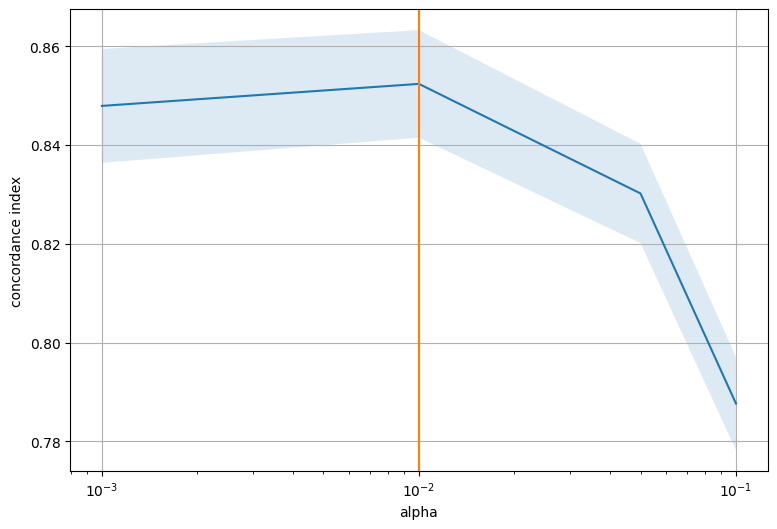

In [50]:
alphas = cv_results.param_alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=0.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(coxnet_cv.best_params_["alphas"][0], c="C1")
# ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

In [36]:
coxnet_cv.best_estimator_

CoxnetSurvivalAnalysis(alphas=[0.01], l1_ratio=0.9)

## Fitting model with best parameter

In [ ]:
random_state = 42
subset = [50, 500, 1000, 2000, 5000, 8000]


N=50 Training time (0.19s):	Train C-Index: 1.0 | Test C-index: 0.647
N=200 Training time (0.28s):	Train C-Index: 0.941 | Test C-index: 0.75
N=500 Training time (0.3s):	Train C-Index: 0.873 | Test C-index: 0.827
N=1000 Training time (0.68s):	Train C-Index: 0.864 | Test C-index: 0.841
N=2000 Training time (0.94s):	Train C-Index: 0.868 | Test C-index: 0.85
N=5000 Training time (2.04s):	Train C-Index: 0.856 | Test C-index: 0.853
N=8000 Training time (2.64s):	Train C-Index: 0.853 | Test C-index: 0.854
CPU times: user 8.2 s, sys: 55.8 ms, total: 8.26 s
Wall time: 8.21 s


In [39]:
# coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.9, alphas=[1e-2], max_iter=10000)
# coxnet.fit(X_train, y_train)

In [14]:
coxnet.score(X_train, y_train)

0.8531652706588324

In [15]:
coxnet.score(X_test, y_test)

0.8536128064032016

Number of non-zero coefficients: 73


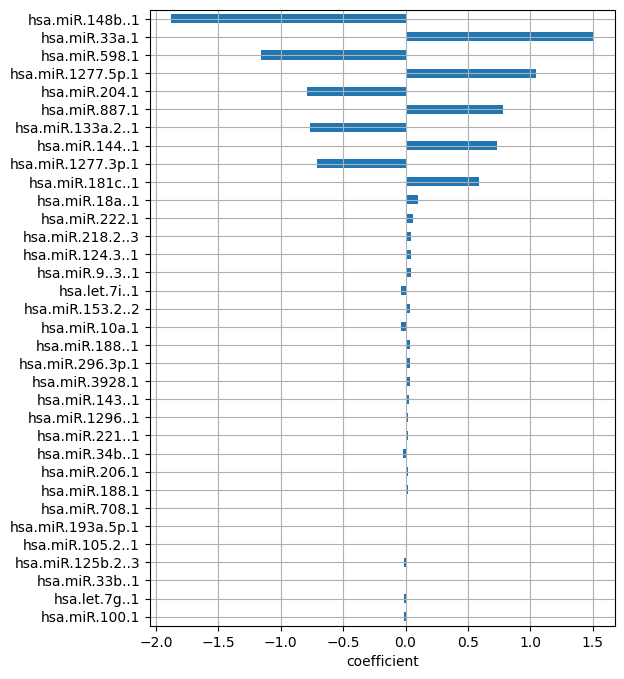

In [43]:

coefficients =  pd.DataFrame({'coefficient': [v[0] for v in coxnet.coef_]}, 
                            index=train_df.columns[:-3])
# coefficients[coefficients!=0]

non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

non_zero_coefs = coefficients[abs(coefficients["coefficient"]) > 1e-2]
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

## Load Data

### Linear: Moderate

In [3]:
# prepare data
folder = 'linear'
keywords = ['moderate', "latest", 'RW']
DATANAME = 'linear-moderate'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)

X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

Train event rate: 0.75075
Test event rate:  0.751


In [ ]:
# parameters for fitting GB models
subset=[
        50,500,1000,2000,5000,8000
]
kwargs = {
    'l1_ratio':0.9, 
    'alphas':[1e-1],
    'max_iter':20000
    }
coxnet = CoxPHElasticNetModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
coxnet.build_model(**kwargs)
coxnet_results, coxnet_dict = coxnet.train(subset=subset)
coxnet_results

N=50 Training time (0.0s): Train C-Index: 0.872 | Test C-index: 0.702


/home/nfs/dengy/dl-survival-miRNA/scr/runSurvModels.py:101: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=20000).
  model = self.model.fit(x_train, y_train)


N=500 Training time (0.42s): Train C-Index: 0.731 | Test C-index: 0.731


/home/nfs/dengy/dl-survival-miRNA/scr/runSurvModels.py:101: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=20000).
  model = self.model.fit(x_train, y_train)


N=1000 Training time (0.63s): Train C-Index: 0.734 | Test C-index: 0.748
N=2000 Training time (0.03s): Train C-Index: 0.73 | Test C-index: 0.743


/home/nfs/dengy/dl-survival-miRNA/scr/runSurvModels.py:101: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=20000).
  model = self.model.fit(x_train, y_train)


N=5000 Training time (6.34s): Train C-Index: 0.737 | Test C-index: 0.757
N=8000 Training time (0.16s): Train C-Index: 0.731 | Test C-index: 0.751


,n train,train time,train score,test score
0,50,0.00,0.871979,0.702455
1,500,0.42,0.730519,0.731492
2,1000,0.63,0.734483,0.747834
3,2000,0.03,0.730220,0.743442
4,5000,6.34,0.737380,0.757127
5,8000,0.16,0.731466,0.750603


In [8]:
coxnet.write(coxnet_results)

### Linear: Weak

Train event rate: 0.75025
Test event rate:  0.7505
Survival time distribution:


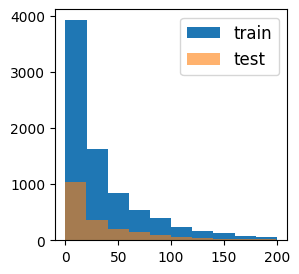

In [10]:
# prepare data
folder = 'linear'
keywords = ['weak', "latest", 'RW']
DATANAME = 'linear-weak'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)

X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

# observe data
print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
# ax.hist(val_df['time'],   label='val', alpha=.8)
ax.hist(test_df['time'], label='test', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

In [ ]:
alphas =  [0.01, 0.1, 1] #coxnet.alphas_

coxnet_hyperparameters={
    "alphas": [[a] for a in alphas],
}
coxnet = CoxPHElasticNetModel(X_train, y_train, X_test, y_test,
                            hyperparameters=coxnet_hyperparameters)
coxnet.build_model()
cv_results = coxnet.tune_hyperparameters(n_split=5, plotting_param='alphas')
# cv_results = pd.DataFrame(coxnet.cv_results_)
cv_results

In [21]:
kwargs = {
    'l1_ratio': 0.9, 
    'alphas':[0.2],
    'max_iter': 100000
    }
coxnet = CoxPHElasticNetModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
coxnet.build_model(**kwargs)
coxnet_results, coxnet_dict = coxnet.train(subset=subset)
coxnet_results

N=50 Training time (0.0s): Train C-Index: 0.757 | Test C-index: 0.634


/home/nfs/dengy/dl-survival-miRNA/scr/runSurvModels.py:101: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100000).
  model = self.model.fit(x_train, y_train)


N=500 Training time (0.54s): Train C-Index: 0.585 | Test C-index: 0.586


/home/nfs/dengy/dl-survival-miRNA/scr/runSurvModels.py:101: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100000).
  model = self.model.fit(x_train, y_train)


N=1000 Training time (1.65s): Train C-Index: 0.667 | Test C-index: 0.652
N=2000 Training time (0.02s): Train C-Index: 0.669 | Test C-index: 0.651
N=5000 Training time (0.06s): Train C-Index: 0.656 | Test C-index: 0.65
N=8000 Training time (0.12s): Train C-Index: 0.656 | Test C-index: 0.653


,n train,train time,train score,test score
0,50,0.00,0.756757,0.633786
1,500,0.54,0.585293,0.586348
2,1000,1.65,0.666956,0.652195
3,2000,0.02,0.668686,0.651006
4,5000,0.06,0.655616,0.650452
5,8000,0.12,0.655968,0.653250


In [24]:
coxnet.write(coxnet_results)

### Nonliear: Quadratic terms

Train event rate: 0.747875
Test event rate:  0.748
Survival time distribution:


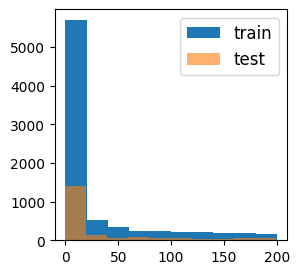

In [30]:
# prepare data
folder = 'nonlinear'
keywords = ['quadratic', "latest", 'RW']
DATANAME = 'nl-quadratic'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)

X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

# observe data
print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
# ax.hist(val_df['time'],   label='val', alpha=.8)
ax.hist(test_df['time'], label='test', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

In [28]:
kwargs = {
    'l1_ratio': 0.9, 
    'alphas':[1e-1],
    'max_iter': 100000
    }
coxnet = CoxPHElasticNetModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
coxnet.build_model(**kwargs)
coxnet_results, coxnet_dict = coxnet.train(subset=subset)
coxnet_results

/home/nfs/dengy/dl-survival-miRNA/scr/runSurvModels.py:101: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100000).
  model = self.model.fit(x_train, y_train)


N=50 Training time (0.57s): Train C-Index: 0.899 | Test C-index: 0.599
N=500 Training time (0.0s): Train C-Index: 0.682 | Test C-index: 0.629
N=1000 Training time (0.01s): Train C-Index: 0.658 | Test C-index: 0.642
N=2000 Training time (0.02s): Train C-Index: 0.633 | Test C-index: 0.621
N=5000 Training time (0.06s): Train C-Index: 0.629 | Test C-index: 0.63
N=8000 Training time (0.13s): Train C-Index: 0.626 | Test C-index: 0.63


,n train,train time,train score,test score
0,50,0.57,0.899388,0.599274
1,500,0.00,0.681711,0.629160
2,1000,0.01,0.658455,0.641701
3,2000,0.02,0.633388,0.621027
4,5000,0.06,0.628771,0.629766
5,8000,0.13,0.625689,0.630002


In [29]:
coxnet.write(coxnet_results)

### Nonliear: Quadratic Interaction

Train event rate: 0.74875
Test event rate:  0.7485
Survival time distribution:


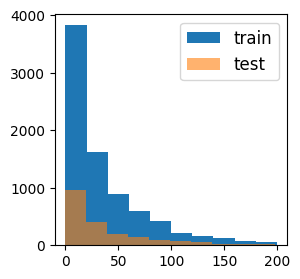

In [2]:
# prepare data
folder = 'nonlinear'
keywords = ['interaction', "latest", 'RW']
DATANAME = 'nl-interaction'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)

X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

# observe data
print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
# ax.hist(val_df['time'],   label='val', alpha=.8)
ax.hist(test_df['time'], label='test', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

In [36]:
kwargs = {
    'l1_ratio': 0.9, 
    'alphas':[0.1],
    'max_iter': 100000
    }
coxnet = CoxPHElasticNetModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
coxnet.build_model(**kwargs)
coxnet_results, coxnet_dict = coxnet.train(subset=subset)
coxnet_results
coxnet.write(coxnet_results)

N=50 Training time (0.0s): Train C-Index: 0.849 | Test C-index: 0.571
N=500 Training time (0.0s): Train C-Index: 0.628 | Test C-index: 0.584
N=1000 Training time (0.01s): Train C-Index: 0.622 | Test C-index: 0.595
N=2000 Training time (0.02s): Train C-Index: 0.619 | Test C-index: 0.599
N=5000 Training time (0.06s): Train C-Index: 0.597 | Test C-index: 0.595
N=8000 Training time (0.13s): Train C-Index: 0.598 | Test C-index: 0.595


### Nonlinear: Sine

Train event rate: 0.75175
Test event rate:  0.752
Survival time distribution:


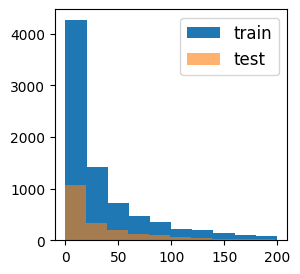

In [37]:
# prepare data
folder = 'nonlinear'
keywords = ['sine', "latest", 'RW']
DATANAME = 'nl-sine'
# train_df, val_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, val_split=True)
train_df, test_df = load_simulate_survival_data(folder=folder, keywords=keywords, test_size=0.2)
X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

# observe data
print(f"Train event rate: {train_df.status.value_counts()[1]/train_df.shape[0]}")
print(f"Test event rate:  {test_df.status.value_counts()[1] /test_df.shape[0]}")

print('Survival time distribution:')
_, ax = plt.subplots(figsize=(3,3))
ax.hist(train_df['time'], label='train')
# ax.hist(val_df['time'],   label='val', alpha=.8)
ax.hist(test_df['time'], label='test', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

In [38]:
kwargs = {
    'l1_ratio': 0.9, 
    'alphas':[0.1],
    'max_iter': 100000
    }
coxnet = CoxPHElasticNetModel(X_train, y_train, X_test, y_test, dataName=DATANAME)
coxnet.build_model(**kwargs)
coxnet_results, coxnet_dict = coxnet.train(subset=subset)
coxnet_results
coxnet.write(coxnet_results)

N=50 Training time (0.0s): Train C-Index: 0.853 | Test C-index: 0.574
N=500 Training time (0.01s): Train C-Index: 0.677 | Test C-index: 0.578
N=1000 Training time (0.01s): Train C-Index: 0.633 | Test C-index: 0.585
N=2000 Training time (0.02s): Train C-Index: 0.617 | Test C-index: 0.595
N=5000 Training time (0.06s): Train C-Index: 0.598 | Test C-index: 0.592
N=8000 Training time (0.12s): Train C-Index: 0.6 | Test C-index: 0.595


In [ ]:
ds_results

,n train,train time,train score,test score
0,50,0.65,0.965414,0.581862
1,500,1.45,0.790279,0.598925
2,1000,2.48,0.690678,0.597732
3,2000,2.87,0.712586,0.626472
4,5000,3.65,0.672141,0.631717
5,8000,4.19,0.713149,0.659110


# Summarize Model Results

In [44]:
subset=[50, 500, 1000, 2000, 5000, 8000]                     
results = pd.DataFrame({'n train': subset})

dataFolderName = 'linear-moderate'
mdl = 'coxnet'

file_dir = os.path.join('models', dataFolderName, mdl, 'model.results.txt')
result_df = pd.read_table(file_dir, index_col=0)

result_df.columns = ["_".join((col, mdl)) if col!='n train' else col for col in result_df.columns.tolist() ]

results = results.merge(result_df, on='n train', how='outer')
results

,n train,train time_coxnet,train score_coxnet,test score_coxnet
0,50,0.00,0.871979,0.702455
1,500,0.42,0.730519,0.731492
2,1000,0.63,0.734483,0.747834
3,2000,0.03,0.730220,0.743442
4,5000,6.34,0.737380,0.757127
5,8000,0.16,0.731466,0.750603


In [ ]:
subset=[50, 500, 1000, 2000, 5000, 8000]
modelnames=['coxnet','rsf','deepsurv-torch']
                        
results = pd.DataFrame({'n train': subset})

dataFolderName = 'linear-moderate'
for mdl in modelnames:
    file_dir = os.path.join('models', dataFolderName, mdl, 'model.results.txt')
    try:
        result_df = pd.read_table(file_dir, index_col=0)
    except:
        continue
    result_df.columns = ["_".join((col, mdl)) if col!='n train' else col for col in result_df.columns.tolist() ]
    results = results.merge(result_df, on='n train', how='outer')# right_on=result_df.columns[0])

In [52]:
def load_simulate_results(dataFolderName, 
                        subset=[50, 500, 1000, 2000, 5000, 8000],
                        modelnames=['coxnet','rsf','deepsurv-torch']):
    
    results = pd.DataFrame({'n train': subset})
    for mdl in modelnames:
        file_dir = os.path.join('models', dataFolderName, mdl, 'model.results.txt')
        try:
            result_df = pd.read_table(file_dir, index_col=0)
        except:
            continue
        result_df.columns = ["_".join((col, mdl)) if col!='n train' else col for col in result_df.columns.tolist() ]
        results = results.merge(result_df, on='n train', how='outer')# right_on=result_df.columns[0])

    return results

In [53]:
dt='linear-moderate'
mod_results=load_simulate_results(dataFolderName=dt)
mod_results

,n train,train time_coxnet,train score_coxnet,test score_coxnet,train time_deepsurv-torch,train score_deepsurv-torch,test score_deepsurv-torch
0,50,0.00,0.871979,0.702455,1.13,0.964387,0.636032
1,500,0.42,0.730519,0.731492,1.64,0.839707,0.715332
2,1000,0.63,0.734483,0.747834,4.16,0.862753,0.743778
3,2000,0.03,0.730220,0.743442,4.22,0.851590,0.759975
4,5000,6.34,0.737380,0.757127,6.66,0.842942,0.769065
5,8000,0.16,0.731466,0.750603,4.45,0.812668,0.783823


In [54]:
dt='linear-weak'
weak_results=load_simulate_results(dataFolderName=dt)
weak_results

,n train,train time_coxnet,train score_coxnet,test score_coxnet,train time_deepsurv-torch,train score_deepsurv-torch,test score_deepsurv-torch
0,50,0.00,0.756757,0.633786,0.97,0.963550,0.600564
1,500,0.54,0.585293,0.586348,1.64,0.820516,0.640975
2,1000,1.65,0.666956,0.652195,3.93,0.822867,0.655382
3,2000,0.02,0.668686,0.651006,2.96,0.750060,0.674700
4,5000,0.06,0.655616,0.650452,5.07,0.755639,0.686296
5,8000,0.12,0.655968,0.653250,4.07,0.736278,0.694876


In [55]:
dt='nl-quadratic'
nl_quadratic_results = load_simulate_results(dataFolderName=dt)
nl_quadratic_results

,n train,train time_coxnet,train score_coxnet,test score_coxnet,train time_rsf,train score_rsf,test score_rsf,train time_deepsurv-torch,train score_deepsurv-torch,test score_deepsurv-torch
0,50,0.57,0.899388,0.599274,0.94,0.805714,0.667348,0.28,0.753070,0.506602
1,200,NaN,NaN,NaN,1.21,0.845678,0.756464,NaN,NaN,NaN
2,500,0.00,0.681711,0.629160,6.23,0.874525,0.799718,1.46,0.805267,0.629765
3,1000,0.01,0.658455,0.641701,NaN,NaN,NaN,3.60,0.848992,0.708403
4,2000,0.02,0.633388,0.621027,NaN,NaN,NaN,9.25,0.911390,0.782270
5,5000,0.06,0.628771,0.629766,NaN,NaN,NaN,14.90,0.911974,0.841033
6,8000,0.13,0.625689,0.630002,NaN,NaN,NaN,9.49,0.910296,0.868213


In [56]:
dt='nl-interaction'
nl_interact_results = load_simulate_results(dataFolderName=dt)
nl_interact_results

,n train,train time_coxnet,train score_coxnet,test score_coxnet,train time_deepsurv-torch,train score_deepsurv-torch,test score_deepsurv-torch
0,50,0.00,0.849237,0.570730,0.35,0.889055,0.572867
1,500,0.00,0.627671,0.584111,1.21,0.640634,0.548789
2,1000,0.01,0.622167,0.594638,3.58,0.797069,0.620305
3,2000,0.02,0.619222,0.599383,2.97,0.746659,0.627064
4,5000,0.06,0.597368,0.595263,4.57,0.710448,0.662410
5,8000,0.13,0.597895,0.595361,5.17,0.709759,0.660115


In [57]:
dt='nl-sine'
nl_sine_results = load_simulate_results(dataFolderName=dt)
nl_sine_results

,n train,train time_coxnet,train score_coxnet,test score_coxnet,train time_deepsurv-torch,train score_deepsurv-torch,test score_deepsurv-torch
0,50,0.00,0.852996,0.574313,0.65,0.965414,0.581862
1,500,0.01,0.677045,0.577635,1.45,0.790279,0.598925
2,1000,0.01,0.633343,0.585416,2.48,0.690678,0.597732
3,2000,0.02,0.617268,0.594636,2.87,0.712586,0.626472
4,5000,0.06,0.597966,0.592153,3.65,0.672141,0.631717
5,8000,0.12,0.600253,0.595144,4.19,0.713149,0.659110


In [62]:
## DeepSurv Results
datanames = ['linear-moderate','linear-weak','nl-interaction','nl-quadratic','nl-sine']

deepsurv_results = pd.DataFrame({'n train': subset})
for name in datanames:
    file_dir = os.path.join('models', name ,'deepsurv-torch', 'model.results.txt')
    try:
        result_df = pd.read_table(file_dir, index_col=0)
    except:
        continue
    result_df.columns = ["_".join((col, name)) if col!='n train' else col for col in result_df.columns.tolist() ]
    deepsurv_results = deepsurv_results.merge(result_df, on='n train', how='outer')# right_on=result_df.columns[0])

deepsurv_results

,n train,train time_linear-moderate,train score_linear-moderate,test score_linear-moderate,train time_linear-weak,train score_linear-weak,test score_linear-weak,train time_nl-interaction,train score_nl-interaction,test score_nl-interaction,train time_nl-quadratic,train score_nl-quadratic,test score_nl-quadratic,train time_nl-sine,train score_nl-sine,test score_nl-sine
0,50,1.13,0.964387,0.636032,0.97,0.963550,0.600564,0.35,0.889055,0.572867,0.28,0.753070,0.506602,0.65,0.965414,0.581862
1,500,1.64,0.839707,0.715332,1.64,0.820516,0.640975,1.21,0.640634,0.548789,1.46,0.805267,0.629765,1.45,0.790279,0.598925
2,1000,4.16,0.862753,0.743778,3.93,0.822867,0.655382,3.58,0.797069,0.620305,3.60,0.848992,0.708403,2.48,0.690678,0.597732
3,2000,4.22,0.851590,0.759975,2.96,0.750060,0.674700,2.97,0.746659,0.627064,9.25,0.911390,0.782270,2.87,0.712586,0.626472
4,5000,6.66,0.842942,0.769065,5.07,0.755639,0.686296,4.57,0.710448,0.662410,14.90,0.911974,0.841033,3.65,0.672141,0.631717
5,8000,4.45,0.812668,0.783823,4.07,0.736278,0.694876,5.17,0.709759,0.660115,9.49,0.910296,0.868213,4.19,0.713149,0.659110


In [63]:
## Baseline: CoxElasticNet
datanames = ['linear-moderate','linear-weak','nl-interaction','nl-quadratic','nl-sine']

cox_results = pd.DataFrame({'n train': subset})
for name in datanames:
    file_dir = os.path.join('models', name ,'coxnet', 'model.results.txt')
    try:
        result_df = pd.read_table(file_dir, index_col=0)
    except:
        continue
    result_df.columns = ["_".join((col, name)) if col!='n train' else col for col in result_df.columns.tolist() ]
    cox_results = cox_results.merge(result_df, on='n train', how='outer')# right_on=result_df.columns[0])

cox_results

,n train,train time_linear-moderate,train score_linear-moderate,test score_linear-moderate,train time_linear-weak,train score_linear-weak,test score_linear-weak,train time_nl-interaction,train score_nl-interaction,test score_nl-interaction,train time_nl-quadratic,train score_nl-quadratic,test score_nl-quadratic,train time_nl-sine,train score_nl-sine,test score_nl-sine
0,50,0.00,0.871979,0.702455,0.00,0.756757,0.633786,0.00,0.849237,0.570730,0.57,0.899388,0.599274,0.00,0.852996,0.574313
1,500,0.42,0.730519,0.731492,0.54,0.585293,0.586348,0.00,0.627671,0.584111,0.00,0.681711,0.629160,0.01,0.677045,0.577635
2,1000,0.63,0.734483,0.747834,1.65,0.666956,0.652195,0.01,0.622167,0.594638,0.01,0.658455,0.641701,0.01,0.633343,0.585416
3,2000,0.03,0.730220,0.743442,0.02,0.668686,0.651006,0.02,0.619222,0.599383,0.02,0.633388,0.621027,0.02,0.617268,0.594636
4,5000,6.34,0.737380,0.757127,0.06,0.655616,0.650452,0.06,0.597368,0.595263,0.06,0.628771,0.629766,0.06,0.597966,0.592153
5,8000,0.16,0.731466,0.750603,0.12,0.655968,0.653250,0.13,0.597895,0.595361,0.13,0.625689,0.630002,0.12,0.600253,0.595144


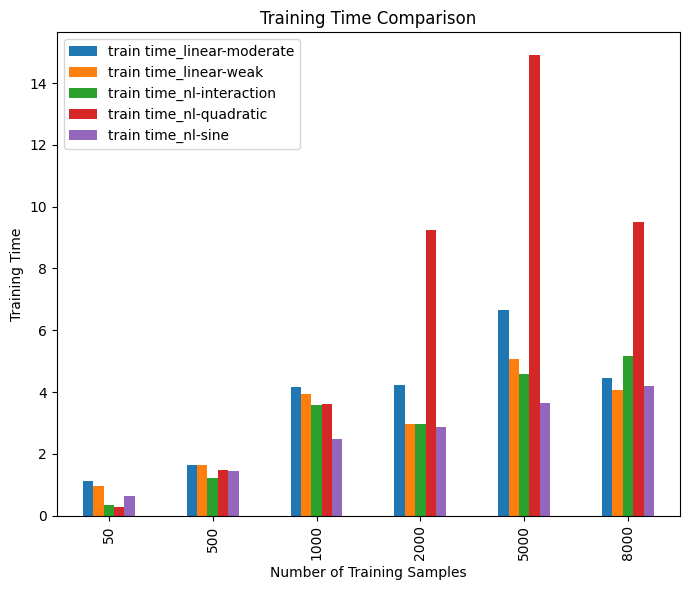

In [64]:
# Plotting
fig, ax = plt.subplots( figsize=(7, 6))

# Plot train time comparison
deepsurv_results.plot(x='n train', y=['train time_'+name for name in datanames], kind='bar', ax=ax)
ax.set_title('Training Time Comparison')
ax.set_ylabel('Training Time')
ax.set_xlabel('Number of Training Samples')


plt.tight_layout()
plt.show()

Text(0.5, 0, 'Number of Training Samples')

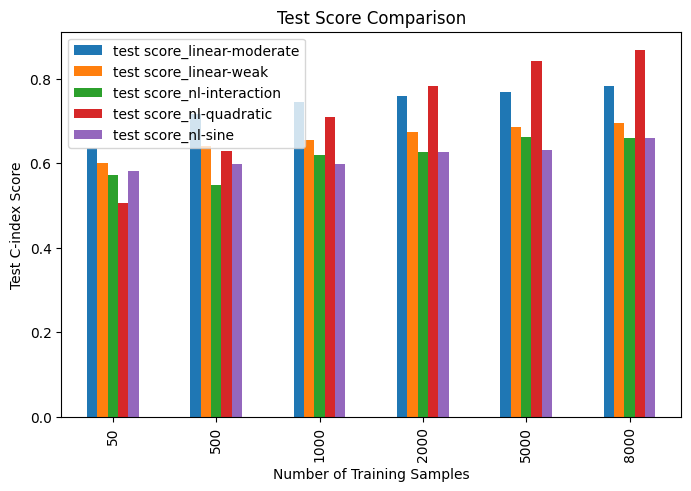

In [66]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot test scores comparison
deepsurv_results.plot(x='n train', y=['test score_'+name for name in datanames], kind='bar', ax=ax)
ax.set_title('Test Score Comparison')
ax.set_ylabel('Test C-index Score')
ax.set_xlabel('Number of Training Samples')

Text(0.5, 0, 'Number of Training Samples')

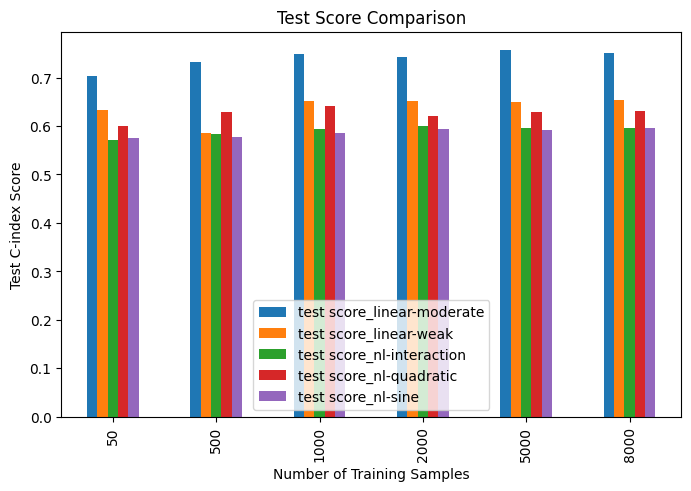

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot test scores comparison
cox_results.plot(x='n train', y=['test score_'+name for name in datanames], kind='bar', ax=ax)
ax.set_title('Test Score Comparison')
ax.set_ylabel('Test C-index Score')
ax.set_xlabel('Number of Training Samples')

# Archive

In [ ]:
%%time
random_state = 42
subset = [50, 200, 500, 1000, 2000, 5000, 8000]
rsf_dict, rsf_train_scores, rsf_test_scores = {},{},{}

for n in subset:
    start = time.time() #record iteration start time
    
    # train the forest with subset of training set
    rsf = RandomSurvivalForest(
        n_estimators=500, 
        min_samples_split=10, 
        min_samples_leaf=15, 
        n_jobs=-1, random_state=random_state
    ).fit(X_train[:n], y_train[:n])

    stop = time.time() #Record time when training finished
    duration = round(stop - start, 2)
    
    train_sc = rsf.score(X_train[:n], y_train[:n])
    test_sc = rsf.score(X_test, y_test)
    print(f"N={n} Training time ({duration}s): Train C-Index: {round(train_sc,3)} | Test C-index: {round(test_sc,3)}")
    
    rsf_train_scores[str(n)] = train_sc
    rsf_test_scores[str(n)] = test_sc
    rsf_dict[str(n)] = rsf
    
#### OLD Scores
# 0.7567028514257128
# 0.8131055527763882
# 0.8276813406703352
# 0.8504412206103051
# 0.8567188594297148

N=50 Training time (1.67s): Train C-Index: 0.8179591836734694 | Test C-index: 0.6269144572286143
N=200 Training time (1.38s): Train C-Index: 0.8337688442211055 | Test C-index: 0.7161860930465233
N=500 Training time (5.23s): Train C-Index: 0.8278396793587174 | Test C-index: 0.7333466733366684
N=1000 Training time (24.26s): Train C-Index: 0.8331131131131131 | Test C-index: 0.7506423211605803
N=2000 Training time (119.71s): Train C-Index: 0.8352256128064032 | Test C-index: 0.7543821910955478
N=5000 Training time (848.3s): Train C-Index: 0.8323171034206841 | Test C-index: 0.7683871935967984
N=8000 Training time (2315.39s): Train C-Index: 0.8329373984248031 | Test C-index: 0.7732251125562781
CPU times: user 7h 33min 37s, sys: 6min 30s, total: 7h 40min 7s
Wall time: 58min 2s
